# Снижение маркетинговых расходов Яндекс.Афиши.
 ## Описание проекта
 Анализ маркетинговой компании Яндекс.Афиши за  период июня 2017 по конец мая 2018 года, с целью сннжения расходов - необходимо отказаться от невыгодных источников трафика и перераспределить бюджет маркетингового отдела.
 Для анализамаркетинговых расходов используются данные: 
    - логи серверов с данными о посещениях сайта Яндекс.Афиши,
    - выгрузка всех заказов за этот период,
    - статистика рекламных расходов.
 Вопросы исследования: 
    - как клиенты пользуются сервисом,
    - когда делают первые покупки на сайте,
    - сколько денег приносит компании каждый клиент,
    - когда расходы на привлечение клиента окупаются.
    
 Выручка измеряется в условных единицах — у.е.

<a id="id0"></a>
## Содержание: 

[1. **Шаг 1. Загрузка данных и подготовка их к анализу.**](#id1)<br>
[2. **Шаг 2. Рассчет метрик и построене графиков.**](#id2)<br>
[*__ Продуктовые метрики*](#id22)<br>
[*__ Метрики электронной коммерции*](#id23)<br>
[*__ Маркетинговые метрики*](#id24)<br>
[3. **Шаг 3. Формулировка выводов и рекомендаций.**](#id3)<br>


<a id="id1"></a>
## Шаг 1. Загрузка данных и подготовка их к анализу
[к содержанию](#id0)<br>

In [1]:
#подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
#выгрузка данных
try:
    costs = pd.read_csv('C:/projects/costs.csv')
    orders_log = pd.read_csv('C:/projects/orders_log.csv')
    visits_log = pd.read_csv('C:/projects/visits_log.csv')
except:
    costs = pd.read_csv(r'/datasets/costs.csv')
    orders_log = pd.read_csv(r'/datasets/orders_log.csv')
    visits_log = pd.read_csv(r'/datasets/visits_log.csv')

In [3]:
#изучение данных
for key, value in {'расходы':costs, 'заказы':orders_log,'визиты':visits_log}.items():
    print('\033[1m' + 'Таблица с данными', key + '\033[0m')
    print ('\033[1m' + 'Вывод метода info()' + '\033[0m')
    value.info()
    print ('\033[1m' + 'Просмотр первых строк таблицы' + '\033[0m')
    print(value.head(5))
    print('\033[1m' +'----------------------------' + '\033[0m')

Таблица с данными расходы
Вывод метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
Просмотр первых строк таблицы
   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
----------------------------
Таблица с данными заказы
Вывод метода info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
Просмотр первых строк таблицы
                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00 

****Справка:**** Изучив, мета данные и данные в таблицах, в отношении предобработки, *пропуски* не обноружены, как и *дубликаты*. Необходимо только произвести замену типов данных, для: 
- таблицы costs в столбце dt
- таблицы orders_log в столбце Buy Ts
- таблицы visits_log в столбцах End Ts, Start Ts

и  в таблицах orders_log и visits_log отредактировать названия столбцов для удобства работы с даными.

В окне ниже производится вся предобработка данных.


In [4]:
#подготовка данных
#редактирование имен столбцов
for i in [visits_log, orders_log]:
    i.columns = i.columns.str.lower().str.replace(' ','_')
#приведение типов данных к datetime 
costs['dt'] =  pd.to_datetime(costs['dt'])   
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts']) 
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'])   
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts']) 
#удаление логических несоответствий
visits_log = visits_log.drop(index=visits_log.query('start_ts> end_ts').index)
orders_log = orders_log.drop(index= orders_log.query('revenue <=0').index )

<a id="id2"></a>
## Шаг 2. Рассчет метрик и построене графиков
[к содержанию](#id0)<br>

Для оценки общего состояния маркетинговой компании и формирования рекомендаций за период, исследуются продуктовые и маркетинговые метрики, а также метрики электронной коммерции.

<a id="id22"></a>
### Расчет продуктовых метрик
[к содержанию](#id0)<br>
Для составления картины активности пользователей и определения объема потенциальных клиентов расчитываются метрики количества посещений активных пользователей в день(DAU), неделю(WAU) или месяц(MAU).


#### - Расчет DAU, WAU и MAU.

РЕЗУЛЬТАТЫ:


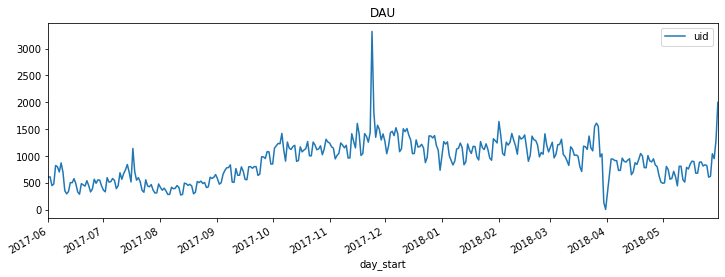

Cреднее количество активных пользователей в день , за весь период -  MAU: 908.0
------------------------------------------------------------------------------------


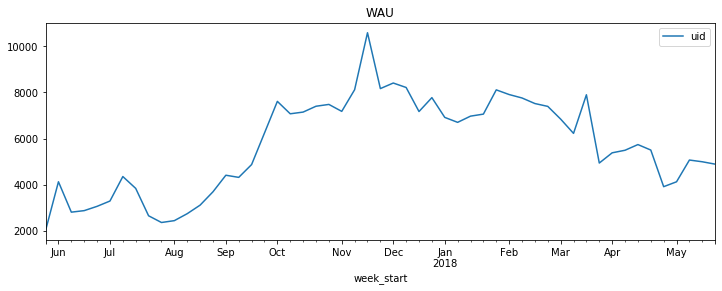

Cреднее количество активных пользователей в неделю , за весь период -  MAU: 5716.0
------------------------------------------------------------------------------------


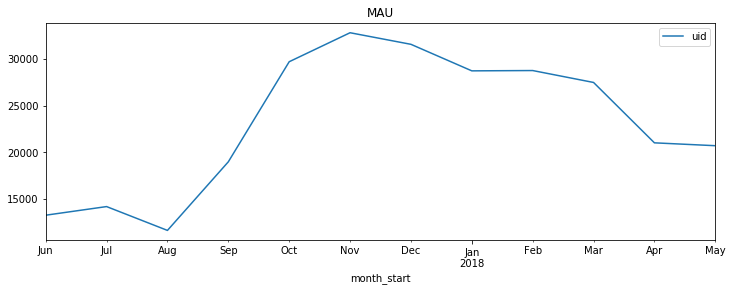

Cреднее количество активных пользователей в месяц , за весь период -  MAU: 23228.0
------------------------------------------------------------------------------------


In [5]:
#подсчет метрик  DAU, WAU, MAU
visits_log['day_start'] = visits_log['start_ts'].astype('datetime64[D]')
visits_log['week_start'] = visits_log['day_start'] - visits_log['start_ts'].dt.weekday*np.timedelta64(1,'D')
visits_log['month_start'] = visits_log['start_ts'].astype('datetime64[M]')
#функция возвращающая среднее количество за весь период 
def au(date_cohort):
    return visits_log.groupby(date_cohort).agg({'uid':'nunique'}).mean().round()
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
#цикл вывода
for key,value in {'day_start':'DAU','week_start':'WAU','month_start':'MAU'}.items():
    title = 'месяц'
    if value == 'DAU': title='день'
    elif value == 'WAU': title='неделю'
    if value == 'DAU':
        visits_log.groupby(key).agg({'uid':'nunique'}).reset_index().plot(key,title = value,figsize=(12,4),label='')
    else: visits_log.groupby(key).agg({'uid':'nunique'}).reset_index().plot(key,title = value ,label='',figsize=(12,4))
    plt.show()
    print('Cреднее количество активных пользователей в',title,', за весь период - ','\033[1m' + 'MAU:'+'\033[0m' , *au(key))
    print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')

#### ВЫВОД:
    Ремарка: для DAU график был взят за период 2 месяцев, чтобы более наглядно отобразить недельные всплески активности. 
    
    - DAU: Из графика видно пользователи проявляют активность ближе к выходным, что в принципе логично, тк на досуге больше людей смотрят кино, ходят в театры и посещют выставки, чем в рабочии дни.
    - WAU: Пиковые активности на 11 неделю и на 22 говорят о появении досугового времени, на 11 неделю обычно выпадает 8 ое марта, на 22 майские праздники, 38-ая и 40-ая недели имеют не значительные вспески (первая приходится на насало сентября втораяна начало октября, и причины вспеска для второй для меня пока не известны), 47-я на начало ноября(День народного единства). Также можно заметить наметившуюся годовую тенденцию активности поьзования сервисом.  
    - MAU: Из годового графика по месяцам, уже более наглядно видно, что в холодное время года сервисом пользуются гораздо активней, чем в теплые, это может быть связаано с отпусками и дачным сезоном.
    
    Имея данные о сезонных/цикличных всплесках и спадах, средства выделяемые на маркетинг стоит сконцентрировать на предпиковом периоде, тогда как на падении активности, по причине занятости людей количество посетителей не прибавится.

####  - Определение среднего количество посещений в день, на одного пользователя:

РЕЗУЛЬТАТЫ:


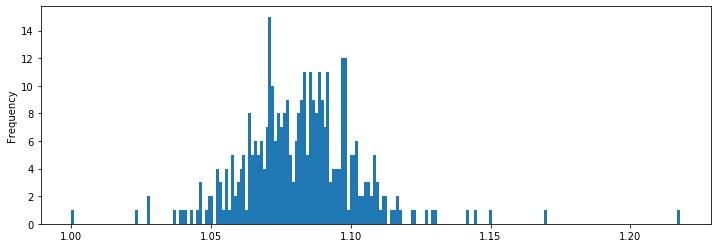

В среднем пользователи заходят на сайт в день 1.08, раз.


In [6]:
#определение среднего количества посещений на одного пользователя
#для каждого дня количество посещений делим на количество уникальных пользователей и берем среднее
day_visits = visits_log.groupby('day_start').agg({'start_ts':'count','uid':'nunique'}).reset_index()
day_visits['v_on_us'] = day_visits['start_ts']/day_visits['uid']
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
day_visits['v_on_us'].plot(kind='hist',figsize=(12,4),bins=210)
plt.show()
print('В среднем пользователи заходят на сайт в день {:.2f}, раз.'.format(day_visits['v_on_us'].mean()))

#### ВЫВОД:
    - В среднем примерно 8 человек из 100, заходят на сайт в течении дня еще раз,  предположу, что эти люди проводят досуг не одни, и в первое посещение изучают\выбирают мероприятие, чтобы презентовать своим спутникам(-цам), а на второй вход, уже покупают билеты. Возможно стоит оценить и изучить ценность подобных посетителей более подробно, для сфокусированной работы над метрикой "готов советовать друзьям"(забыл, как она называется)

#### - Исследование времени прибывания на сайте и определение продолжитильности типичной пользовательской сессии
    - диаграмма распределения продолжительности сессии прибывания на сайте  
    - диаграмма изменения продолжительности сессии во времени

РЕЗУЛЬТАТЫ:
Популярность продолжительности поьзовательской сессии


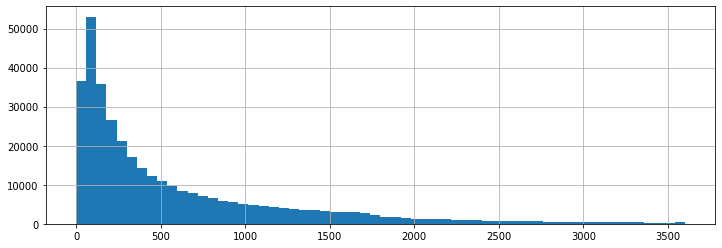

In [7]:
#получение времени сессии
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
print('Популярность продолжительности поьзовательской сессии')
visits_log['session'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.seconds
visits_log['session'].hist(bins=60,range=(0, 3600),figsize=(12,4))
plt.show()

Ремарка: В таком графике средниее и медианное значения будут являтся искаженной величиной, поэтому в качестве характерной велечины для распределения принемается мода. Так же, ниже, расмотрено значение сессии изменяемое во времени. 

Мода пользовательской сесии равна 60 секундам
------------------------------------------------------------------------------------
Изменение продолжительности поьзовательской сессии во времени (обозначено красным)


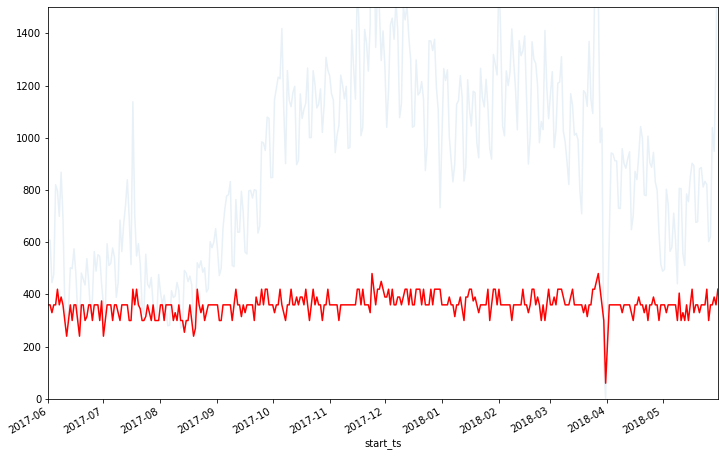

In [8]:
#мода распределения времени сессии в секуднах
print('Мода пользовательской сесии равна', *visits_log['session'].mode(), 'секундам')
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
print('Изменение продолжительности поьзовательской сессии во времени (обозначено красным)')
#Продолжительность сессии на протяжении всего периода.
delta = visits_log.groupby('start_ts').agg({'session':'median'}).reset_index()
#Гранулирование для наглядности графика, на день.
delta['start_ts']=delta['start_ts'].astype('datetime64[D]')
#Отбрасывается 1 секундное время прибывания и то, что больше часа.(маловероятно, что за 1 секунду можно получить полезную информацию с сайта) 
query_d = delta.query('1<session<3600')
ax = visits_log.groupby('day_start').agg({'uid':'nunique'}).reset_index().plot('day_start',figsize=(12,4),label='',alpha=0.1,legend=False,ylim=(0,1500))
query_d.groupby('start_ts').agg({'session':'median'}).plot(color='red',figsize=(12,8),ax=ax, legend=False,label='')
plt.show()
visits_log.drop(['day_start','week_start','month_start','session'], axis='columns',inplace=True)

#### ВЫВОД:
    - Характерное время прибывания на сайте равняется одной минуте, не много не мало, купить билеты или узнать во сколько сеанс\спертакль вполне достаточно.
    - Сопоставлены график продолжительности сессии и количество посешений. Из сопоставления видно, что всплески массового повышения продолжительности сессии распределены в близи пиков посещаемости (вероятно в предпраздничные дни)
    
    Из этого можно сделать вывод, что люди более подробно изучают сайт, планируют свой досуг.  Возможно стоит оценить и изучить ценность таких посетителей и скорректировать даты анонсов предстоящих премьер на первой странице сайта.

#### - Расчет Retention Rate и нахождение средний Retention Rate на второй месяц «жизни» когорт.

РЕЗУЛЬТАТЫ:
Средний Retention Rate на второй месяц «жизни» когорт 5.64%
------------------------------------------------------------------------------------


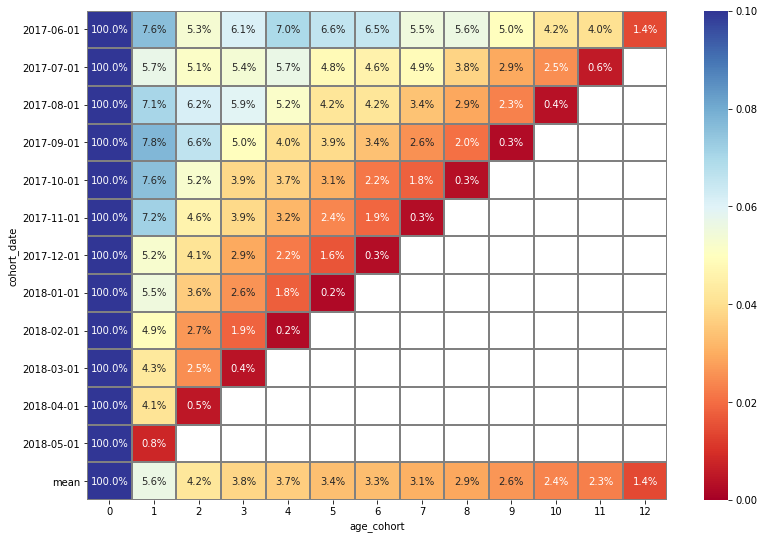

In [9]:
#создание столбца в таблице с датой первого визита для каждого пользователя (размер когорты месяц)
#выделение дат первых посещений
date_cohorts = visits_log.groupby('uid').agg({'start_ts':'min'}).reset_index()
date_cohorts.columns = ['uid','cohort_date']
date_cohorts['cohort_date'] = date_cohorts['cohort_date'].astype('datetime64[D]')
#добавление столбца первых видитов для таблицы всех визитов
if 'cohort_date' not in visits_log.columns:
    visits_log= pd.merge(visits_log, date_cohorts, left_on= 'uid',right_on= 'uid')
#возраст когорты
visits_log['age_cohort'] = ((visits_log['start_ts'] - visits_log['cohort_date'])/np.timedelta64(1,'M')).round().astype('int')
visits_log['cohort_date'] = visits_log['cohort_date'].astype('datetime64[M]')
report = visits_log.groupby(['cohort_date','age_cohort']).agg({'uid':'nunique'}).reset_index()
#столбец с количеством человек нулевого вораста
value = report[report['age_cohort']==0][['cohort_date','uid']]
value.columns=['cohort_date','uid_zero']
report = pd.merge(report,value,left_on='cohort_date',right_on='cohort_date',how='left')
#retantion_rate
report['retantion'] = report['uid']/report['uid_zero']
report['cohort_date'] = report['cohort_date'].dt.strftime('%Y-%m-%d') #приведение типа, для чистоты графика
report_pivot = report.pivot_table(index='cohort_date',columns='age_cohort', values='retantion')
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
print('Средний Retention Rate на второй месяц «жизни» когорт {:.2%}'.format(report_pivot.reset_index()[1].mean()))
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
report_pivot.loc['mean'] = report_pivot.mean()
#тепловая карта
plt.figure(figsize=(13,9))
sns.heatmap(report_pivot
           ,annot=True
           ,fmt='.1%'
           ,linewidths=1
           , linecolor = 'gray'
           , cmap='RdYlBu'
           ,vmin =0,vmax =0.1)
plt.show()

#### ВЫВОД:
    - Как видно из сводной таблицы огромное количество посетителей не возвращаются на следующий месяц. Сложно оценить с какими факторами это может быть связано. Однако начиная второго месяца, проглядывается более нагядная тенденция "удержания" пользователей. В среднем, на второй месяц жизни для всех когорт Ratention Rate = 5.64%.
    - также заметно, что удержание пользователей в декабре 2017, на второй месяц жизни, снизилось на 2%. Стоит изучить изменения в компании вносимые в этот период и изучить изменения рынка. 

<a id="id23"></a>
### Расчет метрик электронной коммерции:  
[к содержанию](#id0)<br>

#### - Исследование интервала времени, с момента первого посещения, до совершения покупки и изменение этой велечины во времени. 

РЕЗУЛЬТАТЫ:
Распределение интервала времени, от момента первого посещения до покупки


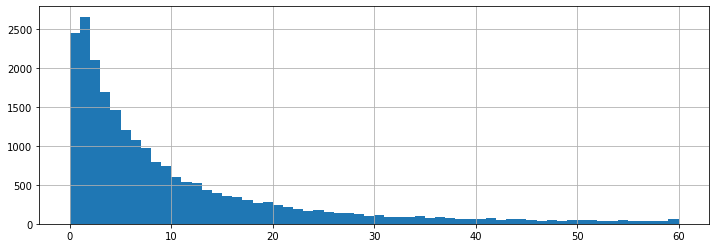

count     36509.000000
mean      24360.706839
std       67816.922801
min           0.000000
25%           4.000000
50%          16.000000
75%        2902.000000
max      523144.000000
Name: time_to_sell, dtype: float64
------------------------------------------------------------------------------------
Изменение интервала времени, от момента первого посещения до покупки на протяжении всего периода


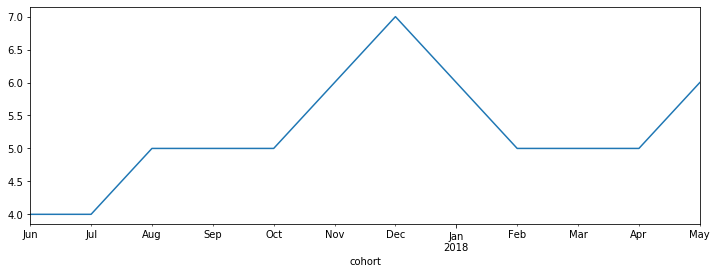

------------------------------------------------------------------------------------
Мода интервала времени, от момента первого посещения до покупки на протяжении всего периода равна 1.0 минуте


In [10]:
a = visits_log.groupby('uid').agg({'start_ts':'min'})
b = orders_log.groupby('uid').agg({'buy_ts':'min'})
v_and_o = pd.merge(a,b,left_on='uid',right_on='uid').reset_index()
v_and_o['time_to_sell'] = (v_and_o['buy_ts'] - v_and_o['start_ts'])/np.timedelta64(1,'m')
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
print('Распределение интервала времени, от момента первого посещения до покупки')
v_and_o['time_to_sell'].hist(figsize=(12,4),bins=60,range=(0,60))
plt.show()
print(v_and_o['time_to_sell'].describe())
v_and_o['cohort'] = v_and_o['start_ts'].astype('datetime64[M]')
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
print('Изменение интервала времени, от момента первого посещения до покупки на протяжении всего периода')
v_and_o.query('time_to_sell < 60').groupby('cohort')['time_to_sell'].agg('median').reset_index().plot(x='cohort',y='time_to_sell',figsize=(12,4),legend = False,label='')
plt.show()
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
print('Мода интервала времени, от момента первого посещения до покупки на протяжении всего периода равна', *v_and_o['time_to_sell'].mode(), 'минуте')

#### ВЫВОД:
    - В подобном распределении описанном в диаграмме, характерной величиной является мода, на графике и из описания данных видно, что имееется огромный хвост. Из чего следует что большая часть людей деает покупку в пределах 7-16 минут с момента первого посещения сайта. 
    - Как видно из графика изменения величины во времени продолжительность между первым посещением и покупкой увеличивается , возможно по причине появления посетителей которые посещают театры и кино не так регулярно, поэтому им нужно изучить больше времени что бы изучить возможные варианты.

#### - Рассчет среднего количества покупок на одного покупателя за 6 месяцев и изучение этой величины во времени

РЕЗУЛЬТАТЫ:
Общее количество покупок на одного человека 1.26
------------------------------------------------------------------------------------
Количество покупок на одного человека по когортам на всех месяцах жизни


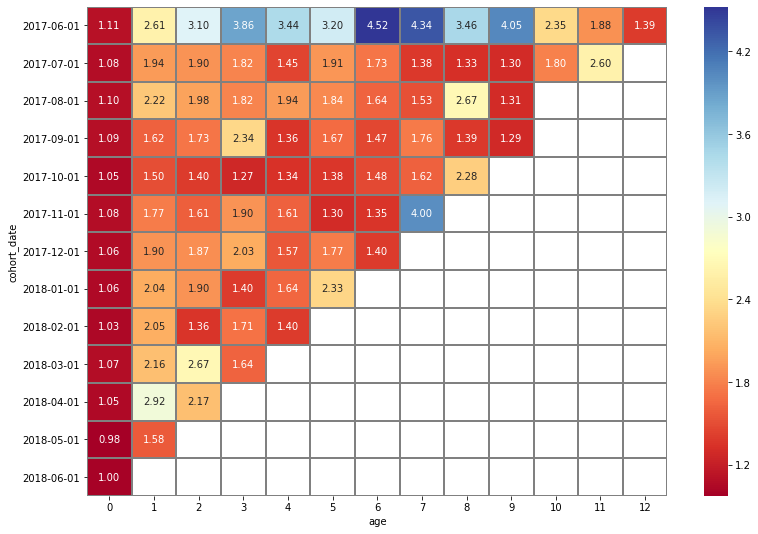

------------------------------------------------------------------------------------
Количество покупок на одного человека по когортам за 6 месяцев жизни
  cohort_date  on_one_u
0  2017-06-01  2.887350
1  2017-07-01  1.682617
2  2017-08-01  1.816277
3  2017-09-01  1.636308
4  2017-10-01  1.323804
5  2017-11-01  1.545896
6  2017-12-01  1.699259
7  2018-01-01  1.726882
------------------------------------------------------------------------------------
Среднее количество покупок на одного человека по когортам за 6 месяцев жизни равняется 1.79


In [11]:
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
print('Общее количество покупок на одного человека {:.2f}'.format( orders_log['buy_ts'].nunique()/orders_log['uid'].nunique()))
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
#получение когорт 
print('Количество покупок на одного человека по когортам на всех месяцах жизни')
a = orders_log.groupby('uid').agg({'buy_ts':'min'}).reset_index()
a.columns = ['uid', 'cohort_date']
a['cohort_date'] = a['cohort_date'].astype('datetime64[D]')
if 'cohort_date' not in orders_log.columns:
    orders_log  = pd.merge(orders_log,a,on ='uid' )
orders_log['age'] =((orders_log['buy_ts'] - orders_log['cohort_date'])/np.timedelta64(1,'M')).round().astype('int')
orders_log['cohort_date'] = orders_log['cohort_date'].astype('datetime64[M]').dt.strftime('%Y-%m-%d')
group_orders = orders_log.groupby(['cohort_date','age']).agg({'uid':'nunique','buy_ts':'nunique'}).reset_index()
group_orders['on_one_u'] = group_orders['buy_ts'] / group_orders['uid']
plt.figure(figsize=(13,9))
sns.heatmap(group_orders.pivot_table(index='cohort_date',columns = 'age',values = 'on_one_u' )
           ,annot=True
           ,fmt='.2f'
           ,linewidths=1
           , linecolor = 'gray'
           , cmap='RdYlBu')
plt.show()
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')      
#когорты с периодом жизни не меньше 6 месяцев
six_month = group_orders[group_orders['age']==5]['cohort_date'].unique()
#среднее количество покупок по когортам на одного покупателя за 6 месяцев
t = group_orders.query('cohort_date in @six_month and age < 6')
print('Количество покупок на одного человека по когортам за 6 месяцев жизни')
m=t.groupby('cohort_date').agg({'on_one_u':'mean'}).reset_index()
print(m)
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m') 
print('Среднее количество покупок на одного человека по когортам за 6 месяцев жизни равняется {:.2f}'.format(m['on_one_u'].mean()))

#### ВЫВОД:
    - как видно из результатов, предварительный подсчет показывает заниженное значение, тогда как более подробный анализ по когортам за 6 месяцев показал, в среднем на 50% большее количество купленных билетов.
    - на сто человек, покупаются дополнительные 79 билетов, возможно это те самые 8 человек, которые заходят на сайт еще раз, в течении дня покупая места для групп.
    - когорты пользователей пришедшие зимой или летом покупают больше билетов на человека чем в меж сезонье, вероятно это связано с определенным типом посетителей.

#### - Рассчет среднего чека

РЕЗУЛЬТАТЫ:
Общий средний чек равен 5.49 
------------------------------------------------------------------------------------
Динамика изменения среднего чека во ремени:


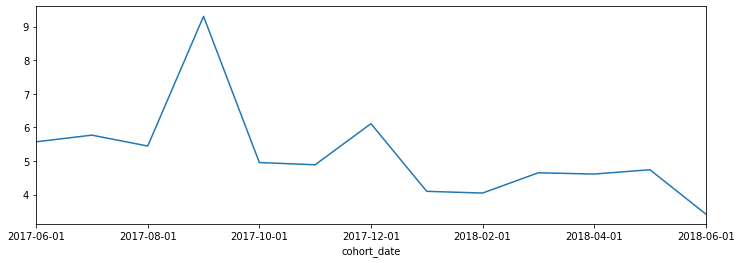

In [12]:
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
avg_order = orders_log.query('revenue != 0').agg({'buy_ts':'nunique','revenue':'sum'})
print("Общий средний чек равен {:.2f} ".format(avg_order['revenue'] /avg_order['buy_ts'])) 
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
#по когортам
#print('Средний чек по когортам равен:')
t= orders_log.query('revenue != 0').groupby('cohort_date').agg({'revenue':'sum','uid':'nunique'}).reset_index()
t['middle'] = t['revenue']/t['uid']
#динамика среднего чека по месяцам продаж
d = orders_log.groupby('cohort_date',as_index=False).agg({'buy_ts':'nunique','revenue':'sum'})
d['middle'] = d['revenue']/d['buy_ts']
print('Динамика изменения среднего чека во ремени:')
d.plot(x='cohort_date',y='middle',figsize=(12,4),legend=False,label='')
plt.show()

#### ВЫВОД:
    - Как видно из когортного распределения среднего чека, что новые пользователи пришедшие в летнее время, имеют средний чек больше,  чем те, что посетили сайт впервой в более холодные месяцы. Вероятно это связано с груповыми посещениями, возможно билеты покупались для студентов или школьников.

#### - Изучение изменения LTV во времени  и расчет  среднего LTV за 6 месяцев , при маржинальности 100%

РЕЗУЛЬТАТЫ:
Изменение во времени LTV на покупателя по когортам


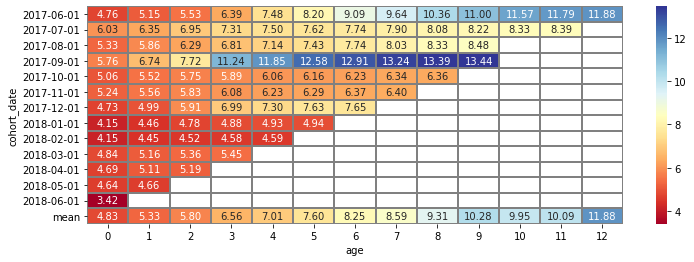

------------------------------------------------------------------------------------
Средний LTV по когортам за 6 месяцев ровняется 7.60


In [13]:
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
print('Изменение во времени LTV на покупателя по когортам')
#получение когортных дат
first_order = orders_log.groupby('uid').agg({'buy_ts':'min'}).reset_index()
first_order.columns = ['uid','date_first_order']
#присоединение
if 'date_first_order' not in orders_log.columns:
    orders_log = pd.merge(orders_log, first_order, left_on = 'uid',right_on = 'uid')
#получение возраста когорты    
orders_log['age'] = ((orders_log['buy_ts'] - orders_log['date_first_order'])/np.timedelta64(1,"M")).round().astype('int')
group_orders = orders_log.groupby(['cohort_date','age']).agg({'revenue':'sum','uid':'nunique'}).reset_index()
#количество человек в когорте на нулевой месяц
n_buyers = group_orders[group_orders['age']==0][['cohort_date','uid']]
n_buyers.columns = ['cohort_date', 'n_buyers']
group_orders = pd.merge(n_buyers, group_orders ,left_on = 'cohort_date',right_on = 'cohort_date')       
group_orders['ltv'] = group_orders['revenue'] /group_orders['n_buyers']
report = group_orders.pivot_table(index = 'cohort_date', columns = 'age' , values= 'ltv')
#накопление ценности
resultn = report.cumsum(axis=1)
resultn.loc['mean'] = resultn.mean()
plt.figure(figsize=(12,4))
sns.heatmap(resultn
           ,annot=True
           ,fmt='.2f'
           ,linewidths=1
           , linecolor = 'gray'
           , cmap='RdYlBu')
plt.show()
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
print('Средний LTV по когортам за 6 месяцев ровняется {:.2f}'.format(resultn.reset_index()[5].mean()))

#### ВЫВОД:
    - Как видно по тепловой карте, ценность клиентов растет, так же, заметно, что у различных когорт разная скорость роста ценности. Ценность клиентов пришедших в сентябре растет быстрее остальных. Возможно это школьники или студенты.
    - После первого месяца жизни по двум следующим месяцам, можно примерно предсказать динамику роста жизненной ценности клиента, более "свежие" когорты показывают менее активный рост LTV на первых месяцах.

<a id="id24"></a>
### Расчет маркетинговыx метрик:
[к содержанию](#id0)<br>

#### - Подсчет общей суммы расходов на маркетинг. Выяснение распределения трат по источникам

РЕЗУЛЬТАТЫ:
Общиая сумма расходов на маркетинг составила 329131.62
------------------------------------------------------------------------------------
Распределение расходов на маркетинг по источникам
   source_id      costs
2          3  141321.63
3          4   61073.60
4          5   51757.10
1          2   42806.04
0          1   20833.27
6         10    5822.49
5          9    5517.49


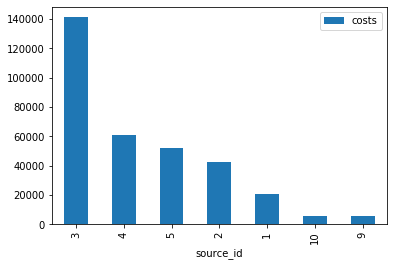

------------------------------------------------------------------------------------
Интенсивость финансирования источников на протяжении всего времени:


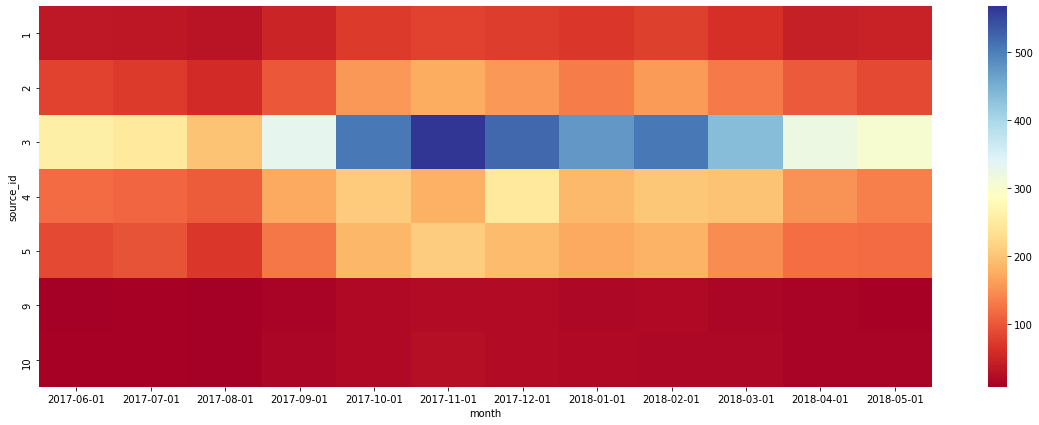

In [14]:
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
group_source = costs.groupby(['source_id']).agg({'costs':'sum'}).reset_index()
print('Общиая сумма расходов на маркетинг составила {:.2f}'.format(group_source.costs.sum()))
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
group_source = group_source.sort_values('costs',ascending=False)
group_source.plot.bar(x='source_id', y='costs')
print('Распределение расходов на маркетинг по источникам')
print(group_source)
plt.show()
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
print('Интенсивость финансирования источников на протяжении всего времени:')
costs['month']= costs['dt'].astype('datetime64[M]').dt.strftime('%Y-%m-%d')
plt.figure(figsize=(20,7))
sns.heatmap(costs.pivot_table(index='source_id',columns ='month',values='costs'), cmap='RdYlBu')
plt.show()

#### ВЫВОД: 
    - По распределению расходов заметен явный фоварит, источник под цифрой 3, тогда как  на источники 10 и 9 выделяется меньше средств.
    - Карта интенсивности финансирования, также показывает насколько несопоставимо приоритетно используется третий источник трафика на протяжении всего года, поэтому диаграмма описывающая распределение средств также характеризует выделение средств на источники с учетом времени.
    - Заметно также, что зимний период - период увеличения трат на привлечение клиентов.

#### - Рассчет среднего CAC на одного покупателя для всего проекта и для каждого источника трафика

РЕЗУЛЬТАТЫ:
Средний САС для всех источников равен 7.09
------------------------------------------------------------------------------------
САС по источникам равен:
   source_id        cac
0          1   5.707745
1          2  10.136405
2          3  12.962909
3          4   5.594870
4          5   7.016960
5          9   4.021494
6         10   4.173828


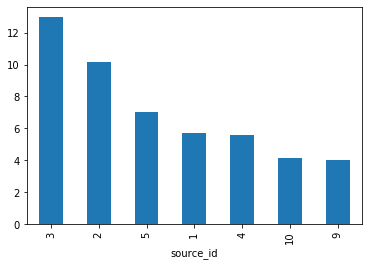

                     n_users  source_id
4       16174680259334210214          4
6       16007536194108375387          5
10      16007536194108375387          3
79       8056418121947262981          1
86       8056418121947262981          1
...                      ...        ...
359357   6752020629696526518          3
359361  11750532881998794555          4
359379  11202626539189016002          4
359393  12734910664455613822         10
359395  11102751930812818282          3

[43183 rows x 2 columns]


In [15]:
'''
cac_all = group_source.costs.sum() / sort_v['uid'].nunique()
print('САС для всего проекта равен {:.2f}'.format(cac_all))
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
a = sort_v.groupby('source_id').agg({'uid':'nunique'}).reset_index()
group_source.columns = ['source_id','uid']
#недостаток данных о всех источниках
table_cac = pd.merge(a,group_source,left_on='source_id',right_on='source_id')
table_cac['cac'] =  table_cac['costs']/table_cac['uid']
table_cac['cac'].sort_values(ascending=False).plot.bar()
print('Распределение стоимости клиентов по источникам')
print()
print(table_cac[['source_id','cac']])
plt.show()'''

print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
#фильтрация посетителей-покупателей
uniq_u = orders_log['uid'].unique()
filtr_v = visits_log.query('uid in @uniq_u').copy()
#нахождение первого источника посеoения для пользователя
a = filtr_v.groupby('uid',as_index=False).agg({'start_ts':'min'})
time = a['start_ts']
user = a['uid']
#получение пользователей с источником первого входа
user_source = filtr_v.query('start_ts in @time and uid in @user')[['uid','source_id']]
user_source.columns = ['n_users','source_id']
result = pd.merge(user_source.groupby('source_id').agg({'n_users':'nunique'}),group_source, on='source_id')
result['cac'] = result['costs'] /result['n_users']
print('Средний САС для всех источников равен {:.2f}'.format(result['cac'].mean()))
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
print('САС по источникам равен:')
print(result[['source_id','cac']])
result[['source_id','cac']].sort_values('cac',ascending=False).plot.bar(y='cac',x='source_id',label='',legend=False)
plt.show()
print(user_source)

#### ВЫВОД: 
    - Стоимость клиента в разных источниках заметно разная. Третий источник самый дорогой, а как было иследовано ранее и замый затратный. Девятый и десятый самые дешевые и на них меньше всего расходуются средств из бюджета на маркетинг. 

#### - Рассчет ROMI по когортам в разрезе источников. Сравнение окупаемости  за одинаковые периоды жизни когорт.(жизненная ценность для клиентов по разным источникам привлечения)

Ремарка: в таблицах имеются источники по которым отсутствуют данные по расходам, тк не известна их природа люди пришедние из этих источников не учитываются в расчетах метрик

РЕЗУЛЬТАТЫ:
ROMI когорт по источникам, за все время существования когорт:


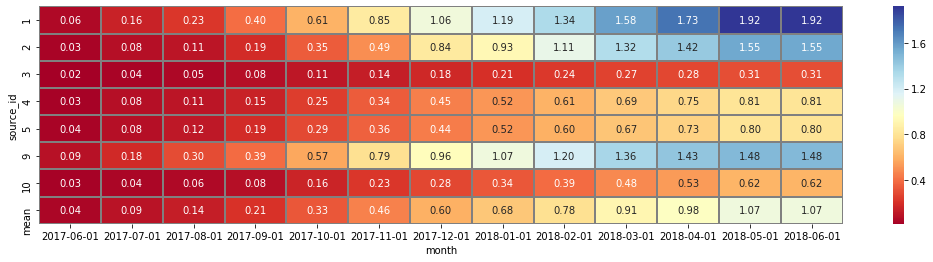

------------------------------------------------------------------------------------
Окупаемость источников, за 5-ый месяц существования когорт:

month source_id  2017-11-01
0             1    0.847682
1             2    0.494708
2             3    0.141856
3             4    0.344927
4             5    0.359628
5             9    0.789038
6            10    0.230334
7          mean    0.458311


In [16]:
###расходы по источникам
tab_costs = costs.groupby('source_id',as_index=False).agg({'costs':'sum'})

#покупатели по источникам первых визитов
#получение id покупателя
filtr = orders_log['uid'].unique()
#фильтр визитов по покупателям
tab_visits = visits_log.query('uid in @filtr')
#первый визит
first_visits  = tab_visits.groupby('uid',as_index=False).agg({'start_ts':'min'})
#покупатели по источнику
source_first_visits = tab_visits.sort_values(by='start_ts',ascending=False).groupby('uid',as_index=False).first()[['source_id','uid']]

###количество чеовек по источнику
count_users_source  = source_first_visits.groupby('source_id',as_index=False).agg({'uid':'nunique'})

#CAC 
cac = count_users_source.merge(tab_costs,on='source_id')
cac['cac'] = cac['costs'] /  cac['uid']
cac = cac[['source_id','cac']]

#LTV
#доходы по источникам
source_month_revenue = orders_log.merge(source_first_visits, on='uid')#[['revenue','uid','source_id']]
#доход в месяц
source_month_revenue['month'] = source_month_revenue['buy_ts'].astype('datetime64[M]')
#доход по месяцу и источнику
ltv = source_month_revenue.groupby(['source_id','month'],as_index=False).agg({'revenue':'sum'})
ltv = ltv.merge(count_users_source,on='source_id')
ltv['ltv'] = ltv['revenue'] / ltv['uid']
romi = ltv.merge(cac,on = 'source_id')
romi['romi'] = romi['ltv']/romi['cac']
romi['month'] = romi['month'].dt.strftime('%Y-%m-%d')

#ROMI
romi_pivot = romi.pivot_table(index='source_id',columns= 'month', values='romi').fillna(0)
romi_pivot = romi_pivot.cumsum(axis=1)
romi_pivot.loc['mean'] = romi_pivot.mean()
#визуаизация
print('\033[1m' +'РЕЗУЛЬТАТЫ:'+'\033[0m')
print('ROMI когорт по источникам, за все время существования когорт:')
plt.figure(figsize=(18,4))
sns.heatmap(romi_pivot
           ,annot=True
           ,fmt='.2f'
           ,linewidths=1
           , linecolor = 'gray'
           , cmap='RdYlBu')
plt.show()
print('\033[1m' +'------------------------------------------------------------------------------------' + '\033[0m')
print('Окупаемость источников, за 5-ый месяц существования когорт:')
print()
print(romi_pivot.reset_index()[['source_id','2017-11-01']])

#### ВЫВОД:
    - Из тепловой карты видно, что источник 3 не окупается вовсе, на протяжении целого года, тогда как самый первый источник по окупаемости под номером один,  окупатся на седьмом месяце.
    - за полугодие ни один из 7 источников не окупился, но первый, второй и девятый источники подают надежды

# <a id="id3"></a>
## Шаг 3. Формулировка выводов и рекомендаций
[к содержанию](#id0)<br>
#### ВЫВОДЫ:
    1. Ориентируясь на ROMI и стоимость клиентов оптимальными источник трафика будет 1 он являются  средним по цене, окупается на седьмой месяц, показывая быстрый рост ROMI в сравнении с остальными источниками, тогда как источник 3, самый дорогой, на него выделяется значительная часть средств и в течении года он не окупается - источник переоценен. Касательно приоритетов распределения бюджета, то бюджет стоит распрделить следующим образом, начиная с самого приоритетного/быстроокупаемого - 1,2,9,5,4,10. 3-ий можно вовсе исключить, тк он показывает самый слабый рост. 5,4,10 источники вероятней всего окупятся на слудующий годовой период.
    2. Выводы по метрикам:
        - Продуктовые метрики:
            - Ориентируясь на предпиковые тенденции посещений, можно планировать емеил рассылки, анонсы в соц сетях или проведение акций. В принципе метрики dau, mau, wau отображают картину потенциальных клиентов для увеличения числа продаж. 
            - Всего 1 из 13 человек заходит на сайт в течении дня еще раз, как самостоятельный факт поведения посетителей это ничего не дает. Нужно изучить поведение посетителей более подробно
            - Характерно-популярное время нахождения на сайте равняется 1 минуте, для выполнения целевого действия вполне достаточно. Однако большая часть всех посетителей прибывает на сайте примерно 7-15 минут и в моменты пикового количества посещений, 'сезонности' эта цифра увеличивается- посетители изучают сайт более подробно. 
            - Retantion rate = 5.64% , также в декабре 2017 заметно изменение, что ретеншен упал возможно был подключен новый источник трафика, который и понизил это значение на 2 процента, для когорт второго месяца существования. Стоит изучить эти изменения! 
        - Метрики электронной коммерции:
            - Характерная веичина интервала между посещением и покупкой равна одной минуте для всего периода, что в принципе совподает со характерным значением прибывания на сайте. Исследуя поведение больше половинной части посетителей, ползователи в холодные месяца года уделяют больше времени изучению сайта, вероятно более тщатеьно планируя и выбирая подходящее время и событие.
            - В среднем 4/5 человек покупает второй билет за шесть месяцев. Это число может колебаться в зависимости, когода чеговек пришел на сайт, в межсезонье это отношение меньше. Тойсть можно прогнозировать, что в межсезонные периоды, понадобится больше средств на привлечение клиетнов, что бы количество привлеченных пользователей купило столько же билетов, что и клиенты пришедшие зимой или летом. 
            - Средний чек составляет 5.49. Размер среднего чека имеет сезонные колебания, вероятно в июне и сентябре групповое посещение рапространено больше всего среди туристов, школьников или студентов имющих скидки на билеты.
            - В среднем LTV за 6 месяцев ровняется 7.60, по тепловой карте также заметен быстрый рост ценности для клиентов пришедших в сентябре на протяжении жизни когорты, что вписывается в вывод описанный выше. Стабильный рост июньской когорты , к сожалению обьяснить не могу.
         - Маркетинговыx метрики:
             - Общие расходы на маркетингсоставляют 329131.62. Из них третий источник забирает большую долю, тогда как не окупается на протяжении года - источник переоценен. Стоит обратить внимание на источник 1 - стоимость клиента в сравнении с другими источниками  средняя и скорость окупаемости мгновенная, а в продолжении также показывает самый быстрый рост ROMI в сравнении с другими источниками - его стоит сделать приоритетным. 
        3. Анализ когорт показал, что самые перспективные посетители являются посетители пришедшие на сайт в июне или сентябре. Июньская когорта имеет самый высокий Retantion Rate и имеет больше покупок на одного человека. Когорты июня и сентября имеют более дорогой средний чек в сравнении с другими когортами, а также их LTV(жизненная ценность) c каждым месяцем жизни растет быстрее остальных. Помимо этого приоритетной когортой являются пользоватеи пришедшие из источника 1 , тк вложения потраченные на них, имеют полугодовую скорость окупаемости, в отношении других источников это самый интересный с точки зрения инвестиций, источник.